# Stockstats - a handy, finance-oriented wrapper of a pandas DataFrame

## Setup

In [2]:
import yfinance as yf
from stockstats import StockDataFrame

## Data

In [3]:
df = yf.download("AAPL",
                 start="2020-01-01",
                 end="2020-12-31")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,72.552094,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,74.207466,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.486023,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,74.071579,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.723213,108872000


## `stockstats` in action

In [4]:
stock_df = StockDataFrame.retype(df)
stock_df

,open,high,low,close,adj close,volume
Date,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,72.552094,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,74.207466,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.486023,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,74.071579,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.723213,108872000
...,...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,130.542862,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,131.549637,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,136.254608,124486200


In [5]:
# returns, daily change and log returns
stock_df[["change", "rate", "close_-1_d", "log-ret"]]

,change,rate,close_-1_d,log-ret
Date,,,,
2019-12-31,NaN,NaN,NaN,NaN
2020-01-02,2.281632,2.281632,1.675003,0.022560
2020-01-03,-0.972204,-0.972204,-0.730003,-0.009770
2020-01-06,0.796825,0.796825,0.592499,0.007937
2020-01-07,-0.470305,-0.470305,-0.352493,-0.004714
...,...,...,...,...
2020-12-23,-0.697602,-0.697602,-0.919998,-0.007000
2020-12-24,0.771224,0.771224,1.009995,0.007683
2020-12-28,3.576571,3.576571,4.720001,0.035141


In [6]:
# 10 day simple moving average
stock_df[["close_10_sma"]]

,close_10_sma
Date,
2019-12-31,73.412498
2020-01-02,74.250000
2020-01-03,74.285833
2020-01-06,74.451874
2020-01-07,74.481000
...,...
2020-12-23,126.955000
2020-12-24,127.828001
2020-12-28,129.256001


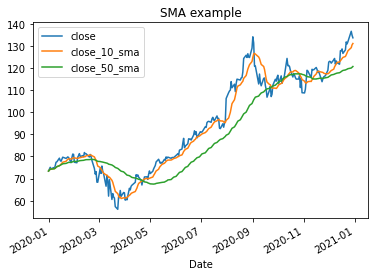

In [7]:
# plot of 10- and 50-day SMAs
stock_df[["close", "close_10_sma", "close_50_sma"]].plot(title="SMA example");

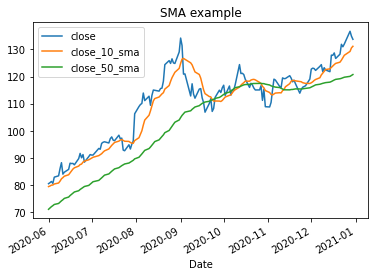

In [8]:
# same plot as above, but filtered by date
stock_df.loc["2020-06-01":, ["close", "close_10_sma", "close_50_sma"]].plot(title="SMA example");

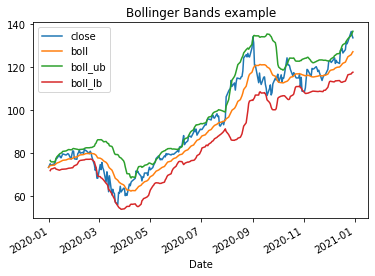

In [9]:
# bollinger bands
stock_df[["close", "boll", "boll_ub", "boll_lb"]].plot(title="Bollinger Bands example");

In [10]:
# crossover example
stock_df["close_xu_close_20_sma"]

Date
2019-12-31    False
2020-01-02     True
2020-01-03    False
2020-01-06    False
2020-01-07    False
              ...  
2020-12-23    False
2020-12-24    False
2020-12-28    False
2020-12-29    False
2020-12-30    False
Name: close_xu_close_20_sma, Length: 253, dtype: bool

In [11]:
# crossover example 2
stock_df["close_10_sma_xd_close_50_sma"]

Date
2019-12-31    False
2020-01-02    False
2020-01-03    False
2020-01-06    False
2020-01-07    False
              ...  
2020-12-23    False
2020-12-24    False
2020-12-28    False
2020-12-29    False
2020-12-30    False
Name: close_10_sma_xd_close_50_sma, Length: 253, dtype: bool

In [12]:
# MACD
stock_df[["macd", "macds", "macdh"]]

,macd,macds,macdh
Date,,,
2019-12-31,0.000000,0.000000,0.000000
2020-01-02,0.037580,0.020878,0.016702
2020-01-03,0.025247,0.022669,0.002579
2020-01-06,0.040411,0.028679,0.011732
2020-01-07,0.033774,0.030195,0.003579
...,...,...,...
2020-12-23,3.154518,2.500894,0.653624
2020-12-24,3.323474,2.665410,0.658064
2020-12-28,3.794496,2.891227,0.903269
